### Los Angeles Neighbourhood analysis for setting up for Indian cuisine

####  setp 1  Importing Libraries


In [44]:
import pandas as pd
import numpy as np
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 


import types
from botocore.client import Config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

print('Libraries imported.')

Libraries imported.


#### Setp 2 Import DataSets {Los Angeles Neighbourhooods and population details}

In [45]:
Census_Tract=pd.read_csv('Census_Tract_LocationsLA_.csv')
Total_Population=pd.read_csv("Total_Population__LA_.csv")


In [46]:
Census_Tract.dtypes

GEOID            object
Tract            object
Tract Number      int64
Neighborhood     object
Location         object
Latitude        float64
Longitude       float64
dtype: object

In [47]:
Census_unique=Census_Tract.drop_duplicates(subset=['Neighborhood'])

In [48]:
Census_unique.head(5)

GEOID                                              Tract  \
0   1400000US06037101110  Census Tract 1011.10, Los Angeles County, Cali...   
6   1400000US06037102103  Census Tract 1021.03, Los Angeles County, Cali...   
8   1400000US06037102105  Census Tract 1021.05, Los Angeles County, Cali...   
10  1400000US06037103101  Census Tract 1031.01, Los Angeles County, Cali...   
12  1400000US06037103200  Census Tract 1032, Los Angeles County, California   

    Tract Number       Neighborhood                    Location   Latitude  \
0         101110            Tujunga   (34.2595555, -118.293602)  34.259555   
6         102103       Shadow Hills    (34.224155, -118.354339)  34.224155   
8         102105         Sun Valley   (34.210852, -118.3480495)  34.210852   
10        103101            Sunland     (34.274431, -118.30714)  34.274431   
12        103200  Lake View Terrace  (34.2745565, -118.3439025)  34.274557   

     Longitude  
0  -118.293602  
6  -118.354339  
8  -118.348050  
10 -118.307140  
12 -118.343902

In [49]:
Total_Population.head(5)

Policy Area           Dataset          Variable  Year   Count  \
0  Demography  Total Population  Total Population  2010  5017.0   
1  Demography  Total Population  Total Population  2010  3663.0   
2  Demography  Total Population  Total Population  2010  6799.0   
3  Demography  Total Population  Total Population  2010  3189.0   
4  Demography  Total Population  Total Population  2010  3808.0   

                  Tract  Tract Number Neighborhood                 GEOID  \
0  Census Tract 1011.10        101110      Tujunga  1400000US06037101110   
1  Census Tract 1011.22        101122      Tujunga  1400000US06037101122   
2  Census Tract 1012.10        101210      Tujunga  1400000US06037101210   
3  Census Tract 1012.20        101220      Tujunga  1400000US06037101220   
4     Census Tract 1013        101300      Tujunga  1400000US06037101300   

                       Location                                      Row ID  \
0  (34.25947853, -118.29299909)  Total_Population_2010_1400000US06037101110   
1  (34.26772618, -118.29015869)  Total_Population_2010_1400000US06037101122   
2  (34.25297726, -118.29074307)  Total_Population_2010_1400000US06037101210   
3  (34.25161333, -118.28164445)  Total_Population_2010_1400000US06037101220   
4  (34.24878243, -118.27101097)  Total_Population_2010_1400000US06037101300   

         Date  
0  01/01/2010  
1  01/01/2010  
2  01/01/2010  
3  01/01/2010  
4  01/01/2010

#### Setp 3 map one Geo Code for each neightbourhood using Pandas Pivot

In [50]:
population_pivot=Total_Population.pivot_table(values='Count',index=['Neighborhood'],columns=['Year'],aggfunc=np.sum)
population_pivot = population_pivot.reset_index()
Population_pivot_sorted=population_pivot.sort_values(2018,ascending = False).groupby('Neighborhood').head(1)
Population_pivot_sorted_top10=Population_pivot_sorted.head(10)
Population_pivot_sorted_top10.set_index('Neighborhood', inplace=True)
Population_pivot_sorted_top10.head(10)


Year                  2010      2011      2012      2013      2014      2015  \
Neighborhood                                                                   
Long Beach        464491.0  465074.0  466201.0  468083.0  471080.0  473084.0   
Glendale          191089.0  190718.0  191166.0  193381.0  195380.0  196984.0   
Santa Clarita     179009.0  181304.0  184743.0  186384.0  188369.0  190484.0   
Palmdale          151700.0  154477.0  157437.0  159248.0  161374.0  162318.0   
Lancaster         149533.0  150851.0  153858.0  154872.0  155839.0  156540.0   
Pomona            149201.0  149368.0  149928.0  150448.0  151825.0  152022.0   
Torrance          143951.0  144622.0  145443.0  146187.0  147181.0  147589.0   
Pasadena          138295.0  138719.0  138961.0  139878.0  140781.0  141632.0   
East Los Angeles  120507.0  121422.0  124140.0  124858.0  124869.0  122557.0   
El Monte          114293.0  114203.0  114161.0  114714.0  115485.0  115948.0   

Year                  2016      2017      2018  
Neighborhood                                    
Long Beach        471985.0  472459.0  470990.0  
Glendale          197895.0  199750.0  200372.0  
Santa Clarita     191708.0  188889.0  190304.0  
Palmdale          162126.0  163077.0  162358.0  
Lancaster         156585.0  156735.0  155605.0  
Pomona            152353.0  152802.0  152823.0  
Torrance          147307.0  147190.0  146392.0  
Pasadena          141931.0  143113.0  143173.0  
East Los Angeles  121361.0  120896.0  117348.0  
El Monte          115547.0  116117.0  116308.0

#### Setp 4 Bar Chart top 10 neighbourhood based on population

Text(0.5, 0, 'neighbourhood')

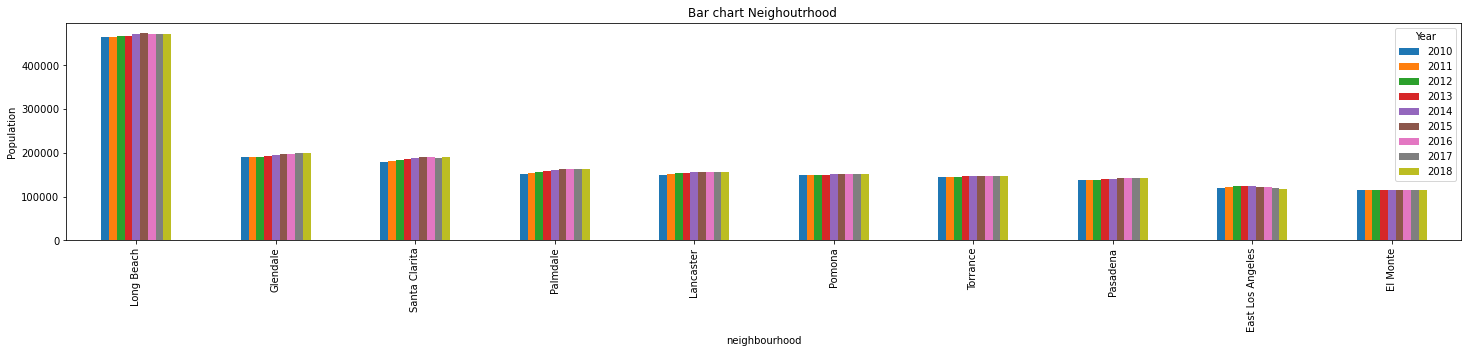

In [51]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

Population_pivot_sorted_top10.plot(kind='bar', figsize=(25, 4),)

plt.title('Bar chart Neighoutrhood ')
plt.ylabel('Population')
plt.xlabel("neighbourhood")


#### setp 5: Pick top10 neighbourhood Geo Coordinates based on top10 populated neighbourhood

In [52]:

Population_pivot_sorted_top10.reset_index()
top10_populationlist=Population_pivot_sorted_top10.index.to_list()
Census_unique_population_top10=Census_unique[Census_unique.Neighborhood.apply(lambda sentence: any(word in sentence for word in top10_populationlist))]
Census_unique_population_top10.shape

(14, 7)

#### step 6 Use google Geocode API to get the Geo locations for given neighbourhood 

In [53]:
address = 'Artesia , California'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 33.8690197, -118.0796195.


In [54]:
Census_unique.head(5)


GEOID                                              Tract  \
0   1400000US06037101110  Census Tract 1011.10, Los Angeles County, Cali...   
6   1400000US06037102103  Census Tract 1021.03, Los Angeles County, Cali...   
8   1400000US06037102105  Census Tract 1021.05, Los Angeles County, Cali...   
10  1400000US06037103101  Census Tract 1031.01, Los Angeles County, Cali...   
12  1400000US06037103200  Census Tract 1032, Los Angeles County, California   

    Tract Number       Neighborhood                    Location   Latitude  \
0         101110            Tujunga   (34.2595555, -118.293602)  34.259555   
6         102103       Shadow Hills    (34.224155, -118.354339)  34.224155   
8         102105         Sun Valley   (34.210852, -118.3480495)  34.210852   
10        103101            Sunland     (34.274431, -118.30714)  34.274431   
12        103200  Lake View Terrace  (34.2745565, -118.3439025)  34.274557   

     Longitude  
0  -118.293602  
6  -118.354339  
8  -118.348050  
10 -118.307140  
12 -118.343902

#### step 7 Use Folium for locating all the LA neighbourhoods

In [55]:
# create map of Los Angeles using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Census_unique['Latitude'], Census_unique['Longitude'], Census_unique['Tract'], Census_unique['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Step 8 we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [56]:
CLIENT_ID = '3K10NH5C1UM1SRAH1IDJBS4TT4CN2LQLNWGFXKR53IU55U4I' # your Foursquare ID
CLIENT_SECRET = 'TWF4UAPNCCQMNIFTZ3GEASEBJCYC41TAGMLVCKF4EVNI4VHC' # your Foursquare Secret
ACCESS_TOKEN = 'JQDR111FYFCOY4ASRNQDFQMFFHA3PPPFUO2YMXOINWNYK5LM' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3K10NH5C1UM1SRAH1IDJBS4TT4CN2LQLNWGFXKR53IU55U4I
CLIENT_SECRET:TWF4UAPNCCQMNIFTZ3GEASEBJCYC41TAGMLVCKF4EVNI4VHC


#### step 9 Now, let's get the top indian restaurants in Los Angeles - Santa Monica, Los Angeles

In [57]:
#address = 'Artesia, Los Angeles'
#address = 'Long Beach, Los Angeles'
address = 'Santa Monica, Los Angeles'
#address = 'Porter Ranch, Los Angeles'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Indian'
radius = 5000
print(search_query + ' .... OK!')

34.0194704 -118.4912273
Indian .... OK!


In [58]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3K10NH5C1UM1SRAH1IDJBS4TT4CN2LQLNWGFXKR53IU55U4I&client_secret=TWF4UAPNCCQMNIFTZ3GEASEBJCYC41TAGMLVCKF4EVNI4VHC&ll=34.0194704,-118.4912273&oauth_token=JQDR111FYFCOY4ASRNQDFQMFFHA3PPPFUO2YMXOINWNYK5LM&v=20180604&query=Indian&radius=5000&limit=30'

In [59]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe08c6de73c1a674a184d22'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4e24bad252b1a3aa2c58868c',
    'name': 'Indian Paintbrush',
    'location': {'address': '1660 Euclid St',
     'lat': 34.019237,
     'lng': -118.482421,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.019237,
       'lng': -118.482421},
      {'label': 'entrance', 'lat': 34.019332, 'lng': -118.482301}],
     'distance': 812,
     'postalCode': '90404',
     'cc': 'US',
     'city': 'Santa Monica',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['1660 Euclid St',
      'Santa Monica, CA 90404',
      'United States']},
    'categories': [],
    'referralId': 'v-1608551533',
    'hasPerk': False},
   {'id': '4c50e8fb375c0f470b211093',
    'name': 'Taos Indian Trading Co',
    'location': {'address': '403 Santa Monica Blvd',
     'lat': 34.016811068401964,
     'lng': -1

In [60]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
venues_list=[]
listval=[]
keys=["name", "latitude", "longitude", "crossStreet", "postalCode", ""]
dataframe = pd.json_normalize(venues)
#print(dataframe)
for index, row in dataframe.iterrows():
    name=row['name']
    latitude=row['location.lat']
    longitude=row['location.lng']
    crossStreet=row['location.formattedAddress']
    postalCode=row['location.postalCode']
    listval=[name,latitude,longitude,crossStreet,postalCode]
    venues_list.append((dict(zip(keys, listval))))
nearby_venues=pd.DataFrame(venues_list)
nearby_venues.head(5)

name   latitude   longitude  \
0       Indian Paintbrush  34.019237 -118.482421   
1  Taos Indian Trading Co  34.016811 -118.494713   
2           Bombay Indian  33.988618 -118.474857   
3          Indian Springs  34.044915 -118.457742   
4        The Indian Pizza  34.000217 -118.441299   

                                         crossStreet postalCode  
0  [1660 Euclid St, Santa Monica, CA 90404, Unite...      90404  
1  [403 Santa Monica Blvd, Santa Monica, CA 90401...      90401  
2  [1301 Ocean Front Walk (Boardwalk), Venice, CA...      90291  
3             [Los Angeles, CA 90025, United States]      90025  
4  [12825 Venice Blvd, Los Angeles, CA 90066, Uni...      90066

In [61]:
nearby_venues.shape

(19, 5)

#### step10 : In google map locate all the India restaurants in Santa Monica 

In [62]:
# create map of Los Angeles using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nearby_venues['latitude'], nearby_venues['longitude'], nearby_venues['name'], nearby_venues['crossStreet']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [63]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### step11 Get all the venues in LA 

In [65]:
## Get all the venues in LA 
LA_venues = getNearbyVenues(names=Census_unique['Neighborhood'],
                                   latitudes=Census_unique['Latitude'], 
                                   longitudes=Census_unique['Longitude']
                                  )

Tujunga
Shadow Hills
Sun Valley
Sunland
Lake View Terrace
Pacoima
Lopez/Kagel Canyons
Sylmar
Granada Hills
Porter Ranch
Chatsworth
Mission Hills
San Fernando
North Hills
Northridge
Chatsworth Reservoir
West Hills
Canoga Park
Winnetka
Arleta
Panorama City
North Hollywood
Valley Glen
Valley Village
Sherman Oaks
Toluca Lake
Van Nuys
Reseda
Lake Balboa
Encino
Tarzana
Woodland Hills
Altadena
Studio City
Hollywood Hills
Eagle Rock
Highland Park
Montecito Heights
Mount Washington
Cypress Park
Glassell Park
Atwater Village
Elysian Valley
Silver Lake
Los Feliz
Hollywood
East Hollywood
Fairfax
Hancock Park
Larchmont
Hollywood Hills West
Beverly Grove
Echo Park
Westlake
Chinatown
Lincoln Heights
El Sereno
Boyle Heights
Elysian Park
Downtown
Pico-Union
Koreatown
Windsor Square
Mid-Wilshire
Arlington Heights
Harvard Heights
Carthay
Pico-Robertson
Mid-City
West Adams
Jefferson Park
Baldwin Hills/Crenshaw
Adams-Normandie
University Park
Exposition Park
Historic South-Central
Central-Alameda
South Par

In [66]:
#LA_venues.to_csv("C:\\Users\gerobins\Documents\Data Science Professional Certificate\capstone\Project data set\LA_venues.csv")
LA_venues=pd.read_csv("LA_venues.csv")
LA_venues.head(5)

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0      Tujunga              34.259555             -118.293602   
1           1      Tujunga              34.259555             -118.293602   
2           2      Tujunga              34.259555             -118.293602   
3           3   Sun Valley              34.210852             -118.348050   
4           4   Sun Valley              34.210852             -118.348050   

                                   Venue  Venue Latitude  Venue Longitude  \
0           Commercial Cool Roof Systems       34.261556      -118.291594   
1                 Canyon Market & Liquor       34.263107      -118.294111   
2                        Burlap and Silk       34.256287      -118.290756   
3  U-Haul Moving & Storage of Sun Valley       34.211351      -118.349032   
4                                  Shell       34.210899      -118.348384   

               Venue Category  
0  Construction & Landscaping  
1                Liquor Store  
2                 Bridal Shop  
3            Storage Facility  
4                 Gas Station

In [67]:
#function to get all the Indian restaurants in LA Neighbourhoods using Foursquare with Search query "Indian"
def getindianrestaurants(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    count=1
    for name, lat, lng in zip(names, latitudes, longitudes):
        print("iteration", count,name)
        count=count+1            
        address = name
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = lat
        longitude = lng
        search_query = 'Indian'
        radius = 10000
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
        listval=[]
        keys=["name", "latitude", "longitude", "crossStreet", "postalCode", ""]
            
        # make the GET request
        results = requests.get(url).json()
        if results:
            time.sleep(5)
            #print(results)
            venues1 = results['response']['venues']
            #print(venues)
            dataframe = json_normalize(venues1)

            #print(dataframe)
            # return only relevant information for each nearby venue
            for index, row in dataframe.iterrows():
                 name=row['name']
                 latitude=row['location.lat']
                 longitude=row['location.lng']
                 crossStreet=row['location.formattedAddress']
                 postalCode=row['location.postalCode']
                 listval=[name,latitude,longitude,crossStreet,postalCode]
                 venues_list.append((dict(zip(keys, listval))))
    restaurants=pd.DataFrame(venues_list)
    return(restaurants)

In [68]:
#Get all the venues in top populated neighbourhoods
Census_unique_population_top10.head(10)
Census_unique_population_top101=Census_unique_population_top10[~Census_unique_population_top10.Neighborhood.str.contains("South El Monte")]
Census_unique_population_top101.shape

LA_restaurants = getindianrestaurants(names=Census_unique_population_top101['Neighborhood'],
                                   latitudes=Census_unique_population_top101['Latitude'], 
                                   longitudes=Census_unique_population_top101['Longitude']
                                  )

iteration 1 Glendale


<ipython-input-67-34dd13b7e72b>:30: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues1)


iteration 2 Pomona
iteration 3 El Monte
iteration 4 Pasadena
iteration 5 East Pasadena
iteration 6 South Pasadena
iteration 7 East Los Angeles
iteration 8 Long Beach
iteration 9 Torrance
iteration 10 Lancaster
iteration 11 Palmdale
iteration 12 Northwest Palmdale
iteration 13 Santa Clarita


In [69]:
LA_restaurants.head(5)
LA_restaurants.to_csv("C:\\Users\gerobins\Documents\Data Science Professional Certificate\capstone\Project data set\LA_Indian_restaurants.csv")

In [70]:
Indian_restaurants=pd.read_csv('LA_Indian_restaurants.csv')
Census_unique=Census_Tract.drop_duplicates(subset=['Neighborhood'])

In [71]:
#drop duplicate restaurants since we are searcing with 10000m radius
Indian_restaurants_unique=Indian_restaurants.drop_duplicates(subset=["name"])
Indian_restaurants_unique.shape

(123, 6)

#### step 12 there are 123 Indian restaurants in LA (top 10 populated neighbourhoods), depict them in google maps

In [72]:
# create map of Los Angeles  using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# create map of Los Angeles using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Indian_restaurants_unique['latitude'], Indian_restaurants_unique['longitude'], Indian_restaurants_unique['name'], Indian_restaurants_unique['crossStreet']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [73]:
#LA Venues grouping
LA_venues.groupby('Neighborhood').count()

Unnamed: 0  Neighborhood Latitude  \
Neighborhood                                                               
Adams-Normandie                                 4                      4   
Agoura Hills                                    7                      7   
Alhambra                                       22                     22   
Alondra Park                                    3                      3   
Altadena                                        3                      3   
Arleta                                          1                      1   
Arlington Heights                              30                     30   
Artesia                                        29                     29   
Athens                                          5                      5   
Atwater Village                                30                     30   
Avalon                                         30                     30   
Avocado Heights                                12                     12   
Azusa                                           4                      4   
Baldwin Hills/Crenshaw                          4                      4   
Baldwin Park                                    4                      4   
Bell                                            7                      7   
Bell Gardens                                    2                      2   
Bellflower                                     20                     20   
Beverly Crest                                   1                      1   
Beverly Grove                                  30                     30   
Beverly Hills                                   2                      2   
Beverlywood                                     4                      4   
Boyle Heights                                   7                      7   
Bradbury                                        2                      2   
Brentwood                                       2                      2   
Broadway-Manchester                             4                      4   
Burbank                                         3                      3   
Calabasas                                       5                      5   
Canoga Park                                     5                      5   
Carson                                          5                      5   
Carthay                                        28                     28   
Central-Alameda                                 4                      4   
Century City                                   30                     30   
Cerritos                                        2                      2   
Charter Oak                                     6                      6   
Chesterfield Square                            26                     26   
Cheviot Hills                                   3                      3   
Chinatown                                       9                      9   
Citrus                                         10                     10   
Commerce                                        1                      1   
Compton                                         5                      5   
Covina                                          2                      2   
Cudahy                                         12                     12   
Culver City                                    30                     30   
Cypress Park                                    8                      8   
Del Aire                                        6                      6   
Del Rey                                        19                     19   
Diamond Bar                                     1                      1   
Downey                                          6                      6   
Downtown                                       29                     29   
Duarte                                         12                     12   
Eagle Rock 

In [74]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [75]:
print('{} venues were returned by Foursquare.'.format(LA_venues.shape[0]))

2151 venues were returned by Foursquare.


In [76]:
print('There are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))

There are 315 uniques categories.


#### step 13 Analyze Each Neighborhood Data Preprocessing

In [77]:
# one hot encoding
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

Neighborhood  ATM  Adult Boutique  Airport Terminal  American Restaurant  \
0      Tujunga    0               0                 0                    0   
1      Tujunga    0               0                 0                    0   
2      Tujunga    0               0                 0                    0   
3   Sun Valley    0               0                 0                    0   
4   Sun Valley    0               0                 0                    0   

   Andhra Restaurant  Antique Shop  Arcade  Argentinian Restaurant  \
0                  0             0       0                       0   
1                  0             0       0                       0   
2                  0             0       0                       0   
3                  0             0       0                       0   
4                  0             0       0                       0   

   Art Gallery  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0            0                    0                     0                 0   
1            0                    0                     0                 0   
2            0                    0                     0                 0   
3            0                    0                     0                 0   
4            0                    0                     0                 0   

   Astrologer  Athletics & Sports  Auto Dealership  Auto Garage  \
0           0                   0                0            0   
1           0                   0                0            0   
2           0                   0                0            0   
3           0                   0                0            0   
4           0                   0                0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0              0                0          0           0       0     0    0   
1              0                0          0           0       0     0    0   
2              0                0          0           0       0     0    0   
3              0                0          0           0       0     0    0   
4              0                0          0           0       0     0    0   

   Baseball Field  Basketball Court  Basketball Stadium  Bath House  \
0               0                 0                   0           0   
1               0                 0                   0           0   
2               0                 0                   0           0   
3               0                 0                   0           0   
4               0                 0                   0           0   

   Bathing Area  Bay  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0             0    0      0                0         0           0   
1             0    0      0                0         0           0   
2             0    0      0                0         0           0   
3             0    0      0                0         0           0   
4             0    0      0                0         0           0   

   Big Box Store  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0              0           0              0          0         0   
1              0           0              0          0         0   
2              0           0              0          0         0   
3              0           0              0          0         0   
4              0           0              0          0         0   

   Bowling Alley  Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  \
0              0               0        0            0                0   
1              0               0        0            0                0   
2              0               0        0            1                0   
3              0               0        0            0                0   
4              0               0        0            0                0   

   Buffet  Building  Burger Joint  Burrito Place  B

#### step 14 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [78]:
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped

Neighborhood       ATM  Adult Boutique  \
0                          Adams-Normandie  0.000000        0.000000   
1                             Agoura Hills  0.000000        0.000000   
2                                 Alhambra  0.000000        0.000000   
3                             Alondra Park  0.000000        0.000000   
4                                 Altadena  0.000000        0.000000   
5                                   Arleta  0.000000        0.000000   
6                        Arlington Heights  0.000000        0.000000   
7                                  Artesia  0.000000        0.000000   
8                                   Athens  0.000000        0.000000   
9                          Atwater Village  0.000000        0.000000   
10                                  Avalon  0.033333        0.000000   
11                         Avocado Heights  0.000000        0.000000   
12                                   Azusa  0.000000        0.000000   
13                  Baldwin Hills/Crenshaw  0.000000        0.000000   
14                            Baldwin Park  0.000000        0.000000   
15                                    Bell  0.000000        0.000000   
16                            Bell Gardens  0.000000        0.000000   
17                              Bellflower  0.000000        0.000000   
18                           Beverly Crest  0.000000        0.000000   
19                           Beverly Grove  0.000000        0.000000   
20                           Beverly Hills  0.000000        0.000000   
21                             Beverlywood  0.000000        0.000000   
22                           Boyle Heights  0.000000        0.000000   
23                                Bradbury  0.000000        0.000000   
24                               Brentwood  0.000000        0.000000   
25                     Broadway-Manchester  0.000000        0.000000   
26                                 Burbank  0.000000        0.000000   
27                               Calabasas  0.000000        0.000000   
28                             Canoga Park  0.000000        0.000000   
29                                  Carson  0.000000        0.000000   
30                                 Carthay  0.000000        0.000000   
31                         Central-Alameda  0.000000        0.000000   
32                            Century City  0.000000        0.000000   
33                                Cerritos  0.000000        0.000000   
34                             Charter Oak  0.000000        0.000000   
35                     Chesterfield Square  0.000000        0.000000   
36                           Cheviot Hills  0.000000        0.000000   
37                               Chinatown  0.000000        0.000000   
38                                  Citrus  0.000000        0.000000   
39                                Commerce  0.000000        0.000000   
40                                 Compton  0.000000        0.000000   
41                                  Covina  0.000000        0.000000   
42                                  Cudahy  0.000000        0.000000   
43                             Culver City  0.000000        0.000000   
44                            Cypress Park  0.000000        0.000000   
45                                Del Aire  0.000000        0.000000   
46                                 Del Rey  0.000000        0.000000   
47                             Diamond Bar  0.000000        0.000000   
48                                  Downey  0.000000        0.000000   
49                                Downtown  0.000000        0.000000   
50                                  Duarte  0.000000        0.000000   
51                              Eagle Rock  0.000000        0.000000   
52                            East Compton  0.000000        0.000000   
53                          East Hollywood  0.000000        0.000000   
54                          East La Mirada  0.000000        0.000000  

In [79]:
LA_grouped.shape

(233, 316)

#### Let's print each neighborhood along with the top 5 most common venues

In [80]:
num_top_venues = 5

for hood in LA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams-Normandie----
           venue  freq
0     Taco Place  0.25
1     Playground  0.25
2  Indie Theater  0.25
3    Gas Station  0.25
4            ATM  0.00


----Agoura Hills----
               venue  freq
0           Car Wash  0.14
1  French Restaurant  0.14
2        Pizza Place  0.14
3   Ramen Restaurant  0.14
4               Park  0.14


----Alhambra----
                  venue  freq
0  Fast Food Restaurant  0.14
1                  Bank  0.14
2                  Park  0.09
3       Bubble Tea Shop  0.05
4      Ramen Restaurant  0.05


----Alondra Park----
              venue  freq
0  Football Stadium  0.33
1    Baseball Field  0.33
2              Park  0.33
3      Optical Shop  0.00
4            Notary  0.00


----Altadena----
              venue  freq
0  Basketball Court  0.33
1              Food  0.33
2       Coffee Shop  0.33
3               ATM  0.00
4         Nightclub  0.00


----Arleta----
             venue  freq
0             Park   1.0
1              ATM   0.0
2  Organ

In [81]:
#### Let's put that into a _pandas_ dataframe

In [140]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [141]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LA_grouped['Neighborhood']

for ind in np.arange(LA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Adams-Normandie            Playground            Taco Place   
1     Agoura Hills  Fast Food Restaurant           Pizza Place   
2         Alhambra                  Bank  Fast Food Restaurant   
3     Alondra Park      Football Stadium        Baseball Field   
4         Altadena                  Food      Basketball Court   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Gas Station         Indie Theater           Escape Room   
1           Dry Cleaner      Ramen Restaurant     French Restaurant   
2                  Park         Grocery Store       Bubble Tea Shop   
3                  Park           Yoga Studio  Fast Food Restaurant   
4           Coffee Shop           Yoga Studio  Fast Food Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Ethiopian Restaurant         Event Service           Event Space   
1              Car Wash                  Park                  Farm   
2                Market            Shoe Store              Tea Room   
3         Event Service           Event Space           Fabric Shop   
4         Event Service           Event Space           Fabric Shop   

  9th Most Common Venue 10th Most Common Venue  
0           Fabric Shop                   Farm  
1           Escape Room   Ethiopian Restaurant  
2          Optical Shop        Automotive Shop  
3                  Farm         Farmers Market  
4                  Farm         Farmers Market

### step 15. Cluster Neighborhoods

In [137]:
# set number of clusters
kclusters = 5

LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.inertia_


55.60450173052421

C:\Users\gerobins\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\gerobins\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\gerobins\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\gerobins\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\gerobins\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py

Text(0, 0.5, 'Inertia')

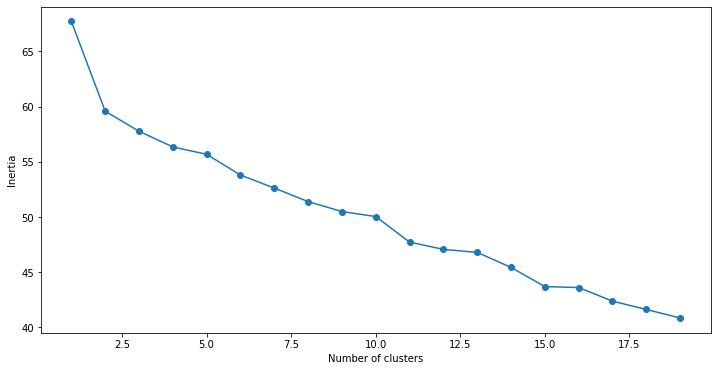

In [129]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(LA_grouped_clustering)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [142]:
# set number of clusters
kclusters = 3

LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.inertia_


57.70901835333629

In [143]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LA_merged = LA_venues

# merge LA_grouped with LA_data to add latitude/longitude for each neighborhood
LA_merged = LA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

LA_merged.head(10) # check the last columns!

Unnamed: 0       Neighborhood  Neighborhood Latitude  \
0           0            Tujunga              34.259555   
1           1            Tujunga              34.259555   
2           2            Tujunga              34.259555   
3           3         Sun Valley              34.210852   
4           4         Sun Valley              34.210852   
5           5         Sun Valley              34.210852   
6           6            Sunland              34.274431   
7           7  Lake View Terrace              34.274557   
8           8  Lake View Terrace              34.274557   
9           9            Pacoima              34.276146   

   Neighborhood Longitude                                  Venue  \
0             -118.293602           Commercial Cool Roof Systems   
1             -118.293602                 Canyon Market & Liquor   
2             -118.293602                        Burlap and Silk   
3             -118.348050  U-Haul Moving & Storage of Sun Valley   
4             -118.348050                                  Shell   
5             -118.348050                    I-5 & Hollywood Way   
6             -118.307140                             Hill climb   
7             -118.343902          Yolanda's Mobile Pet Grooming   
8             -118.343902                        Hansen Dam Area   
9             -118.404645                      Metro by T-Mobile   

   Venue Latitude  Venue Longitude              Venue Category  \
0       34.261556      -118.291594  Construction & Landscaping   
1       34.263107      -118.294111                Liquor Store   
2       34.256287      -118.290756                 Bridal Shop   
3       34.211351      -118.349032            Storage Facility   
4       34.210899      -118.348384                 Gas Station   
5       34.212464      -118.348493                Intersection   
6       34.273212      -118.312073              Scenic Lookout   
7       34.274210      -118.347640                   Pet Store   
8       34.270724      -118.343458                  Campground   
9       34.277064      -118.399356           Mobile Phone Shop   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0           Bridal Shop          Liquor Store   
1               0           Bridal Shop          Liquor Store   
2               0           Bridal Shop          Liquor Store   
3               0      Storage Facility           Gas Station   
4               0      Storage Facility           Gas Station   
5               0      Storage Facility           Gas Station   
6               0        Scenic Lookout           Yoga Studio   
7               0            Campground             Pet Store   
8               0            Campground             Pet Store   
9               0     Mobile Phone Shop   Filipino Restaurant   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Construction & Landscaping         Event Service           Event Space   
1  Construction & Landscaping         Event Service           Event Space   
2  Construction & Landscaping         Event Service           Event Space   
3                Intersection           Yoga Studio  Fast Food Restaurant   
4                Intersection           Yoga Studio  Fast Food Restaurant   
5                Intersection           Yoga Studio  Fast Food Restaurant   
6        Fast Food Restaurant           Escape Room  Ethiopian Restaurant   
7                 Yoga Studio  Fast Food Restaurant  Ethiopian Restaurant   
8                 Yoga Studio  Fast Food Restaurant  Ethiopian Restaurant   
9        Ethiopian Restaurant         Event Service           Event Space   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Fabric Shop                  Farm        Farmers Market   
1           Fabric Shop                  Farm        Farmers Market   
2           Fabric Shop                  Farm        Farmers Market   
3  Ethiopian Restaurant      

In [144]:
# venues in clusters
LA_merged["Cluster Labels"].value_counts()

0    2095
1      28
2      28
Name: Cluster Labels, dtype: int64

In [145]:
LA_merged.groupby("Cluster Labels").count()

Unnamed: 0  Neighborhood  Neighborhood Latitude  \
Cluster Labels                                                    
0                     2095          2095                   2095   
1                       28            28                     28   
2                       28            28                     28   

                Neighborhood Longitude  Venue  Venue Latitude  \
Cluster Labels                                                  
0                                 2095   2095            2095   
1                                   28     28              28   
2                                   28     28              28   

                Venue Longitude  Venue Category  1st Most Common Venue  \
Cluster Labels                                                           
0                          2095            2095                   2095   
1                            28              28                     28   
2                            28              28                     28   

                2nd Most Common Venue  3rd Most Common Venue  \
Cluster Labels                                                 
0                                2095                   2095   
1                                  28                     28   
2                                  28                     28   

                4th Most Common Venue  5th Most Common Venue  \
Cluster Labels                                                 
0                                2095                   2095   
1                                  28                     28   
2                                  28                     28   

                6th Most Common Venue  7th Most Common Venue  \
Cluster Labels                                                 
0                                2095                   2095   
1                                  28                     28   
2                                  28                     28   

                8th Most Common Venue  9th Most Common Venue  \
Cluster Labels                                                 
0                                2095                   2095   
1                                  28                     28   
2                                  28                     28   

                10th Most Common Venue  
Cluster Labels                          
0                                 2095  
1                                   28  
2                                   28

In [146]:
LA_merged.to_csv("kmeans.csv")

In [147]:
LA_merged.head(5)

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0      Tujunga              34.259555             -118.293602   
1           1      Tujunga              34.259555             -118.293602   
2           2      Tujunga              34.259555             -118.293602   
3           3   Sun Valley              34.210852             -118.348050   
4           4   Sun Valley              34.210852             -118.348050   

                                   Venue  Venue Latitude  Venue Longitude  \
0           Commercial Cool Roof Systems       34.261556      -118.291594   
1                 Canyon Market & Liquor       34.263107      -118.294111   
2                        Burlap and Silk       34.256287      -118.290756   
3  U-Haul Moving & Storage of Sun Valley       34.211351      -118.349032   
4                                  Shell       34.210899      -118.348384   

               Venue Category  Cluster Labels 1st Most Common Venue  \
0  Construction & Landscaping               0           Bridal Shop   
1                Liquor Store               0           Bridal Shop   
2                 Bridal Shop               0           Bridal Shop   
3            Storage Facility               0      Storage Facility   
4                 Gas Station               0      Storage Facility   

  2nd Most Common Venue       3rd Most Common Venue 4th Most Common Venue  \
0          Liquor Store  Construction & Landscaping         Event Service   
1          Liquor Store  Construction & Landscaping         Event Service   
2          Liquor Store  Construction & Landscaping         Event Service   
3           Gas Station                Intersection           Yoga Studio   
4           Gas Station                Intersection           Yoga Studio   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Event Space           Fabric Shop                  Farm   
1           Event Space           Fabric Shop                  Farm   
2           Event Space           Fabric Shop                  Farm   
3  Fast Food Restaurant  Ethiopian Restaurant         Event Service   
4  Fast Food Restaurant  Ethiopian Restaurant         Event Service   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0        Farmers Market  Fast Food Restaurant    Filipino Restaurant  
1        Farmers Market  Fast Food Restaurant    Filipino Restaurant  
2        Farmers Market  Fast Food Restaurant    Filipino Restaurant  
3           Event Space           Fabric Shop                   Farm  
4           Event Space           Fabric Shop                   Farm

In [148]:
LA_merged.columns

Index(['Unnamed: 0', 'Neighborhood', 'Neighborhood Latitude',
       'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude',
       'Venue Category', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

#### step 16 clusters in Google Map

In [163]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LA_merged['Neighborhood Latitude'], LA_merged['Neighborhood Longitude'], LA_merged['Neighborhood'], LA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### step 17 cluster analysis

In [150]:
cluster0=LA_merged.loc[LA_merged['Cluster Labels'] == 0, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]

In [151]:
cluster1=LA_merged.loc[LA_merged['Cluster Labels'] == 1, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]

In [152]:
cluster2=LA_merged.loc[LA_merged['Cluster Labels'] == 2, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]

#### step 18 Finaluze the Cluster Neighbourhoods for planing Indian restaurants

In [153]:
list1=Census_unique_population_top101.Neighborhood.to_list()

In [154]:
#Top neighbourhoods based on population
print(list1)

['Glendale', 'Pomona', 'El Monte', 'Pasadena', 'East Pasadena', 'South Pasadena', 'East Los Angeles', 'Long Beach', 'Torrance', 'Lancaster', 'Palmdale', 'Northwest Palmdale', 'Santa Clarita']


In [160]:
cluster0_neighbourhood=cluster0["Neighborhood"].unique()
set(cluster0_neighbourhood).intersection(list1)

{'East Los Angeles',
 'East Pasadena',
 'El Monte',
 'Long Beach',
 'Northwest Palmdale',
 'Pomona',
 'Santa Clarita',
 'Torrance'}

In [161]:
cluster1_neighbourhood=cluster1["Neighborhood"].unique()
set(cluster1_neighbourhood).intersection(list1)

{'Glendale', 'South Pasadena'}

In [162]:
cluster2_neighbourhood=cluster2["Neighborhood"].unique()
set(cluster2_neighbourhood).intersection(list1)

set()

## As per the analysis cluster 0 Neighbourhood is picked up after deep analysis there were 49 neighbourhoods, in which based on top population we finalized  following six Neighbourhoods for planning new Indian restaurants 

## 'East Los Angeles', 'East Pasadena', 'El Monte', 'Long Beach', "Northwest Palmdale", "Pomona", "Torrance"
